### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 30 cm


In [2]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_00"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle                                     
lhcb1 collider_00        6.000000e+10            100.0                                        4.5   
                                                 102.5                                        4.5   
                                                 105.0                                        4.5   
                                                 107.5                                        4.5   
                                                 110.0                                        4.5   
...                                                                                           ...   
      collider_02        1.400000e+11            157.5                                        4.5   
                                                 160.0                                        4.5   
                                                 165.0                                        4.5   
                                                 167.5                                        4.5   
                                                 170.0                                        4.5   

                                                                     qx  \
beam  name base collider num_particles_per_bunch crossing_angle           
lhcb1 collider_00        6.000000e+10            100.0           62.313   
                                                 102.5           62.313   
                                                 105.0           62.313   
                                                 107.5           62.313   
                                                 110.0           62.313   
...                                                                 ...   
      collider_02        1.400000e+11            157.5           62.313   
                                                 160.0           62.313   
                                                 165.0           62.313   
                                                 167.5           62.313   
                                                 170.0           62.313   

                                                                     qy   dqx  \
beam  name base collider num_particles_per_bunch crossing_angle                 
lhcb1 collider_00        6.000000e+10            100.0           60.318  15.0   
                                                 102.5           60.318  15.0   
                                                 105.0           60.318  15.0   
                                                 107.5           60.318  15.0   
                                                 110.0           60.318  15.0   
...                                                                 ...   ...   
      collider_02        1.400000e+11            157.5           60.318  15.0   
                                                 160.0           60.318  15.0   
                                                 165.0           60.318  15.0   
                                                 167.5           60.318  15.0   
                                                 170.0           60.318  15.0   

                                                                  dqy  \
beam  name base collider num_particles_per_bunch crossing_angle         
lhcb1 collider_00        6.000000e+10            100.0           15.0   
                                                 102.5           15.0   
                                                 105.0           15.0   
                                                 107.5           15.0   
                                                 110.0           15.0   
...                                                               ...   
      collider_02        1.400000e+11            157.5           15.0   
                                                 160.0          

In [3]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
df_to_plot


crossing_angle,100.0,102.5,105.0,107.5,110.0,112.5,115.0,117.5,120.0,122.5,...,147.5,150.0,152.5,155.0,157.5,160.0,162.5,165.0,167.5,170.0
num_particles_per_bunch,,,,,,,,,,,,,,,,,,,,,
0.600,4.5,4.5,4.5,4.500,4.500,4.750,4.719,4.625,5.000,5.062,...,6.188,6.031,6.469,6.562,6.594,6.438,NaN,NaN,6.938,NaN
0.625,4.5,4.5,4.5,4.531,4.500,4.594,4.625,4.906,4.938,4.969,...,6.188,6.000,6.344,6.406,6.469,6.406,NaN,6.688,NaN,NaN
0.650,4.5,4.5,4.5,4.500,4.500,4.531,4.562,4.562,4.875,5.031,...,6.000,6.219,6.312,6.312,6.125,6.406,6.344,NaN,NaN,NaN
0.675,4.5,4.5,4.5,4.500,4.500,4.500,4.500,4.625,4.812,4.969,...,6.125,5.875,6.312,6.250,6.438,6.281,NaN,NaN,NaN,NaN
0.700,4.5,4.5,4.5,4.500,4.531,4.594,4.500,4.531,4.594,4.875,...,6.062,6.031,6.062,6.281,6.156,6.469,NaN,NaN,NaN,NaN
0.725,4.5,4.5,4.5,4.500,4.500,4.531,4.500,4.656,4.656,4.938,...,5.875,5.906,6.219,5.969,6.156,6.375,6.438,NaN,NaN,NaN
0.750,4.5,4.5,4.5,4.500,4.500,4.500,4.531,4.500,4.750,4.781,...,5.750,5.875,5.906,6.125,6.281,6.219,6.219,NaN,NaN,NaN
0.775,4.5,4.5,4.5,4.500,4.500,4.531,4.500,4.500,4.656,4.719,...,5.719,5.906,6.031,6.188,6.000,6.156,NaN,NaN,NaN,NaN
0.800,4.5,4.5,4.5,4.500,4.500,4.500,4.500,4.500,4.656,4.688,...,5.812,5.812,5.875,6.031,5.969,6.062,6.031,NaN,NaN,NaN


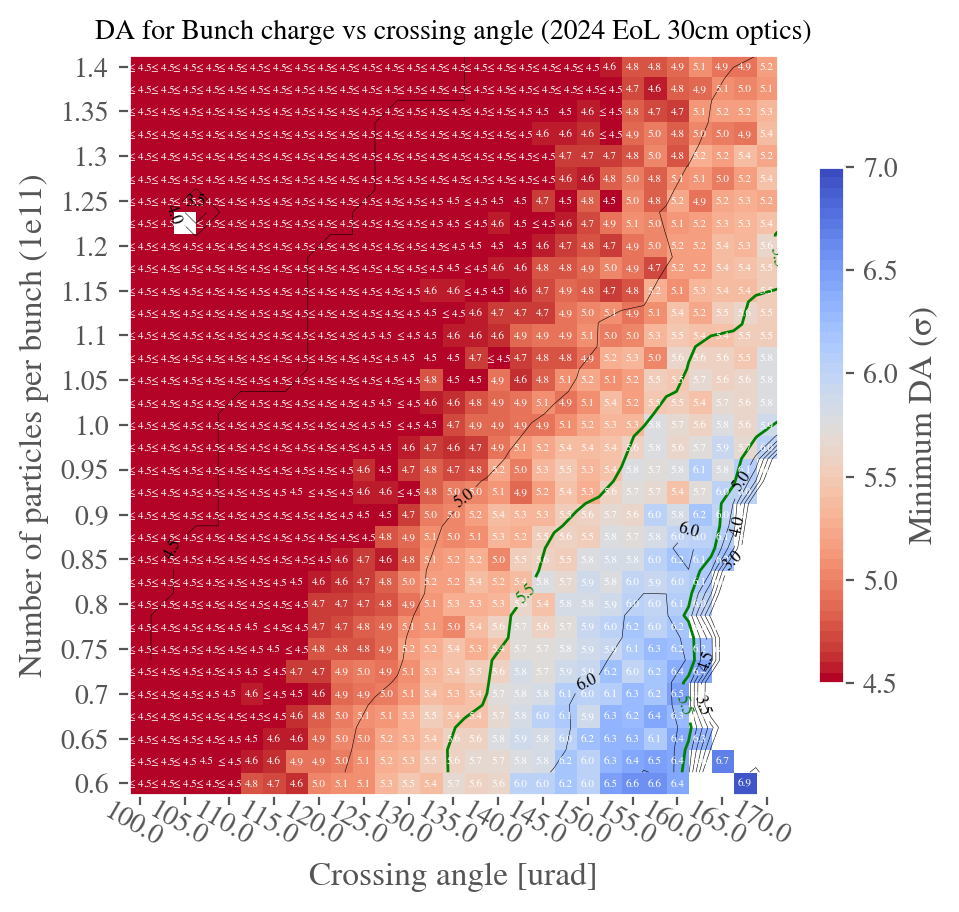

In [4]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 30cm optics)"
)


In [5]:
df_30_cm = df_to_plot.copy()

### 26cm

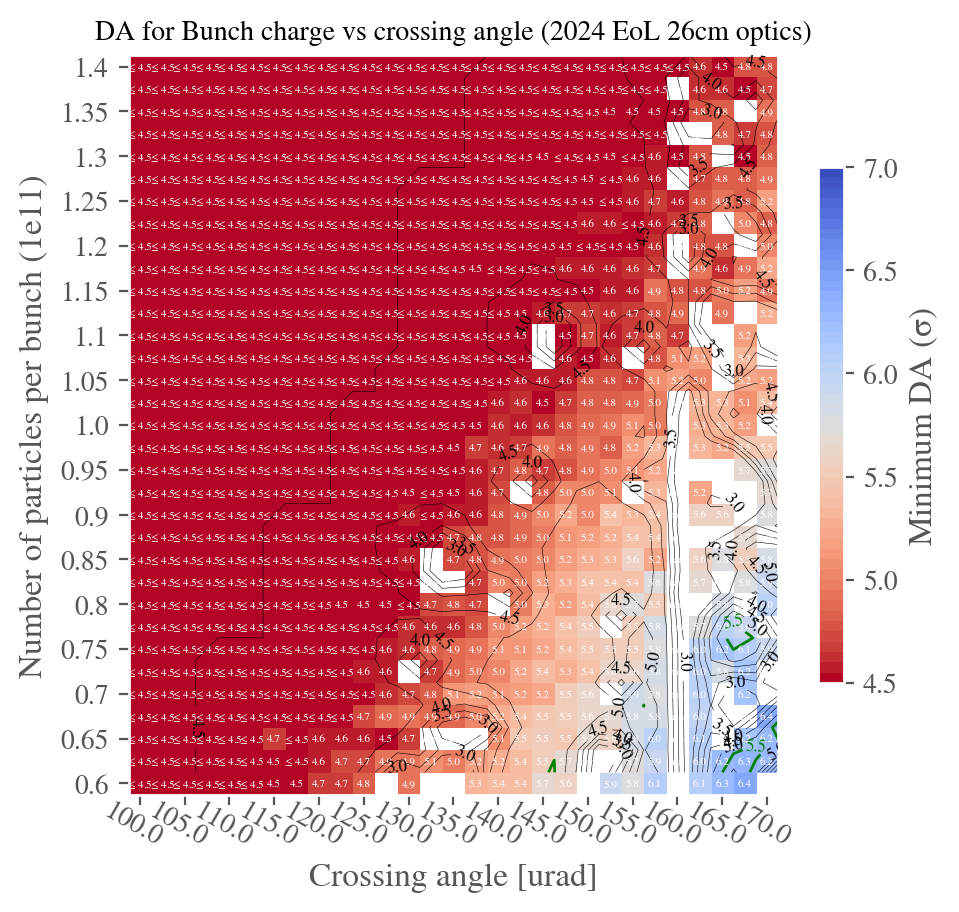

In [6]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_01"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 26cm optics)"
)

In [7]:
df_26_cm = df_to_plot.copy()

### 24 cm

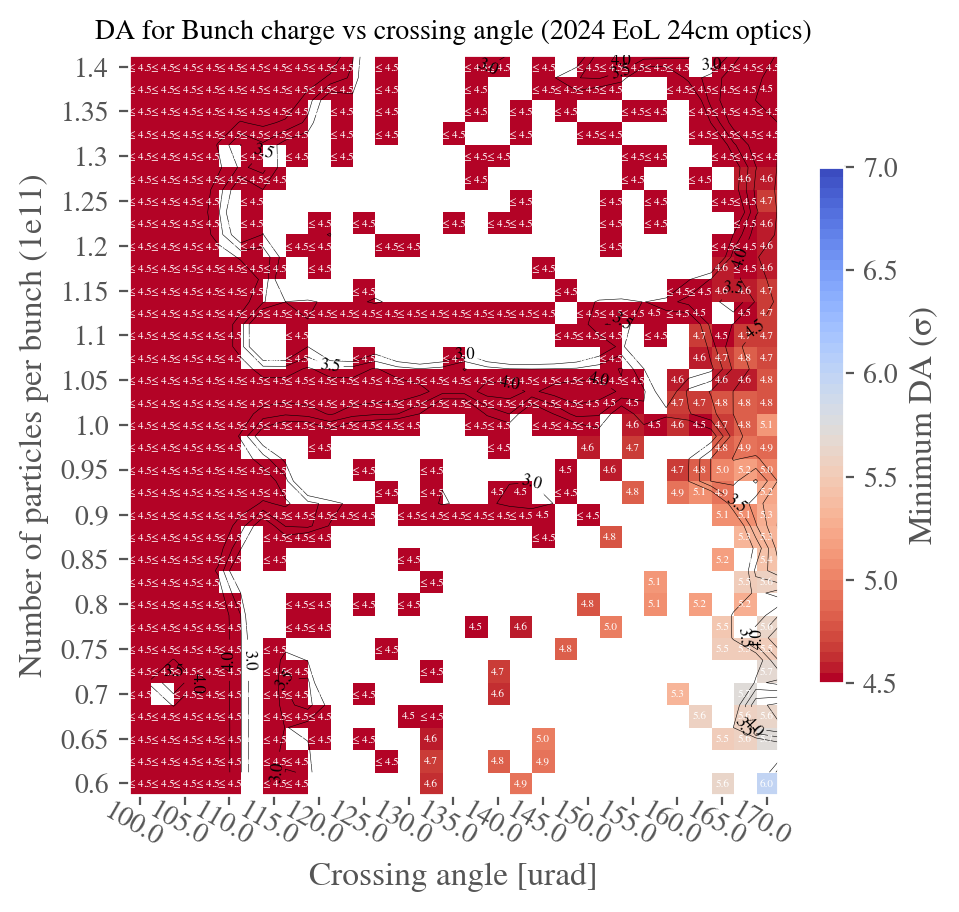

In [8]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_02"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 24cm optics)"
)

In [9]:
df_24_cm = df_to_plot.copy()

## Interpolate the data for each optics

In [10]:
from scipy import interpolate
import numpy as np

In [11]:
x = df_30_cm.index
y = df_30_cm.columns
array = np.ma.masked_invalid(df_30_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_30cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)

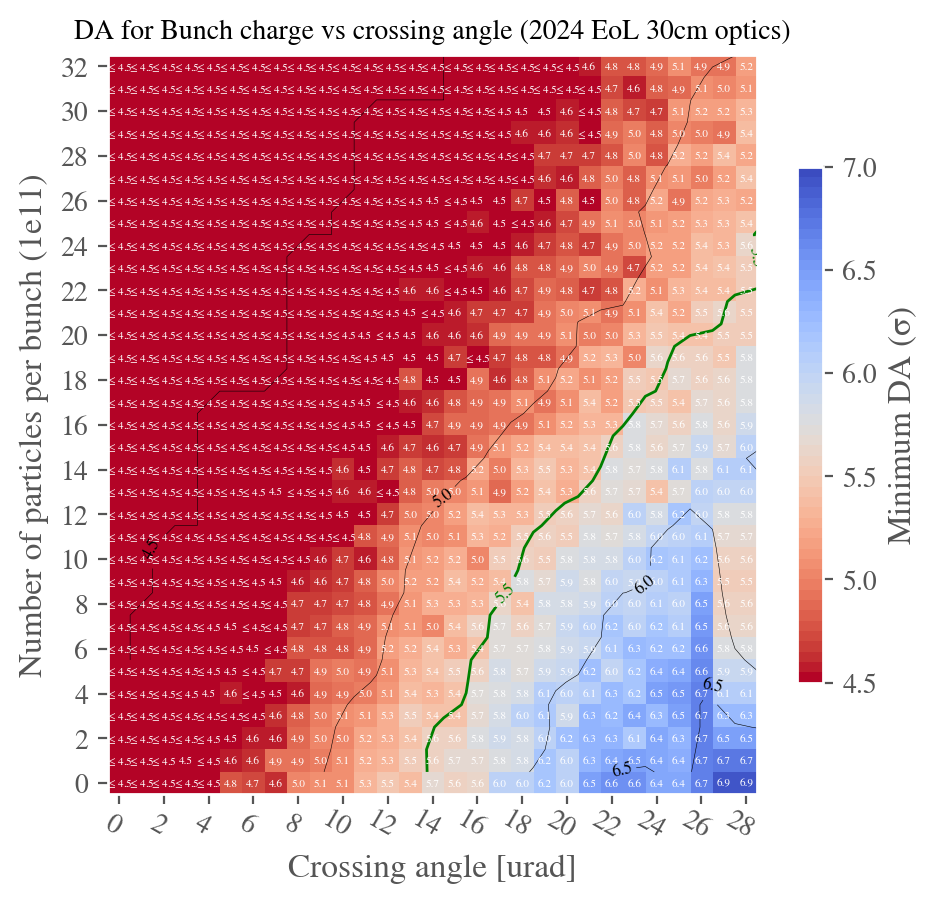

In [12]:
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_30cm,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 30cm optics)"
)

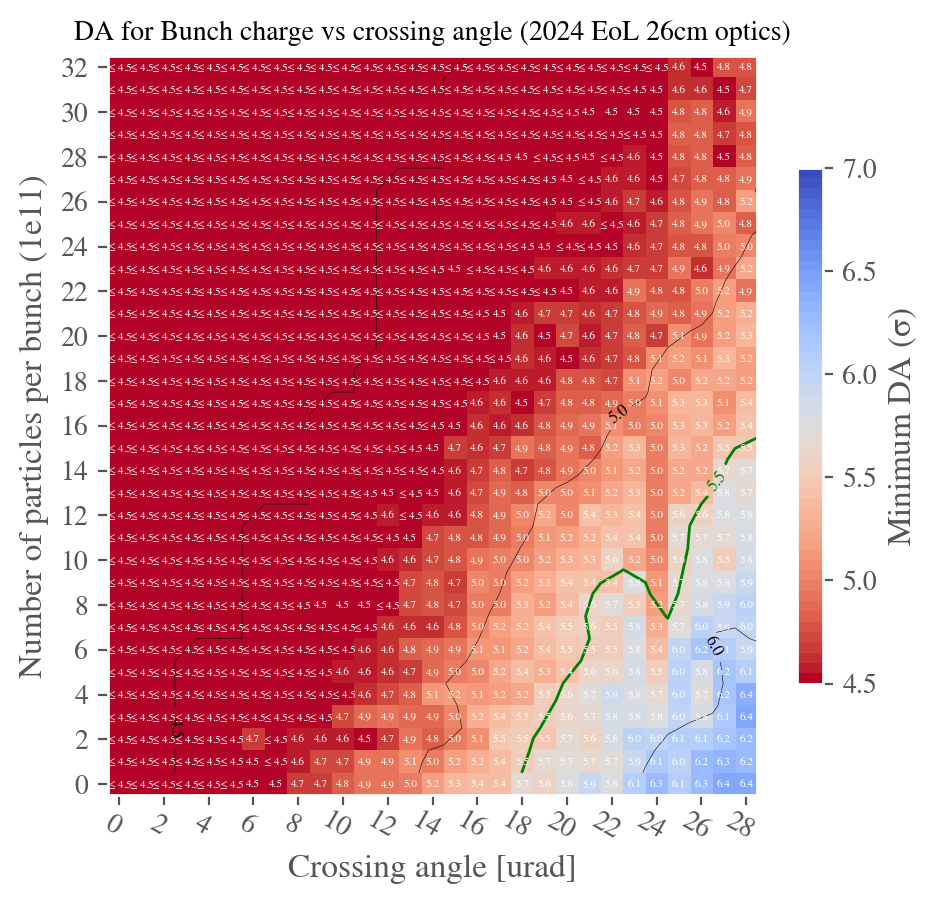

In [13]:
x = df_26_cm.index
y = df_26_cm.columns
array = np.ma.masked_invalid(df_26_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_26cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)

conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_26cm,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 26cm optics)"
)

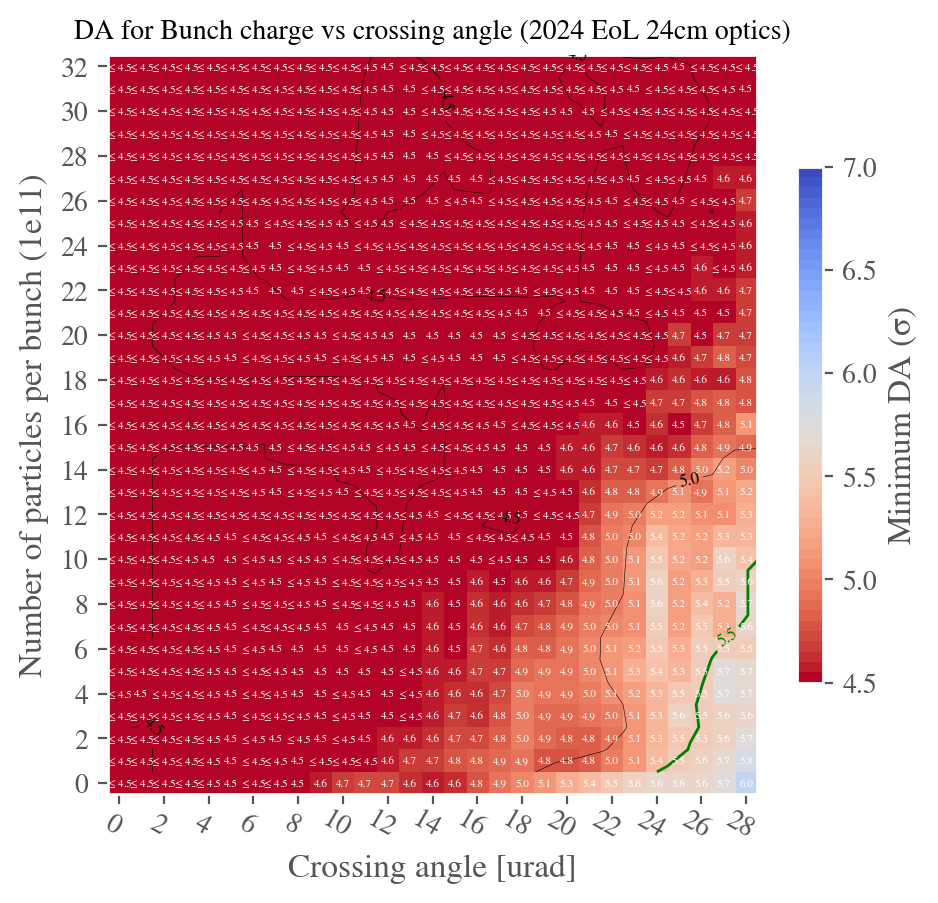

In [14]:
x = df_24_cm.index
y = df_24_cm.columns
array = np.ma.masked_invalid(df_24_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_24cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)

conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_24cm,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 24cm optics)"
)

### Find contours

In [17]:
from skimage.measure import find_contours
import matplotlib.pyplot as plt
contours = find_contours(interpolate_df_30cm.values, level=5.5)

In [20]:
fig, ax = plt.subplots(1, 1)
img = ax.imshow(interpolate_df_30cm.values, origin='lower')
plt.colorbar(img)
for i in range(len(contours)):
    p = plt.Polygon(contours[i][:,[1,0]], fill=False, color='w', closed = False)
    ax.add_artist(p)
    
plt.show()

In [54]:
# Smooth a lot to have a smooth contour
from scipy.ndimage import gaussian_filter
smooth = gaussian_filter(interpolate_df_30cm.values, sigma=1)
contours = find_contours(smooth, level=5.5)


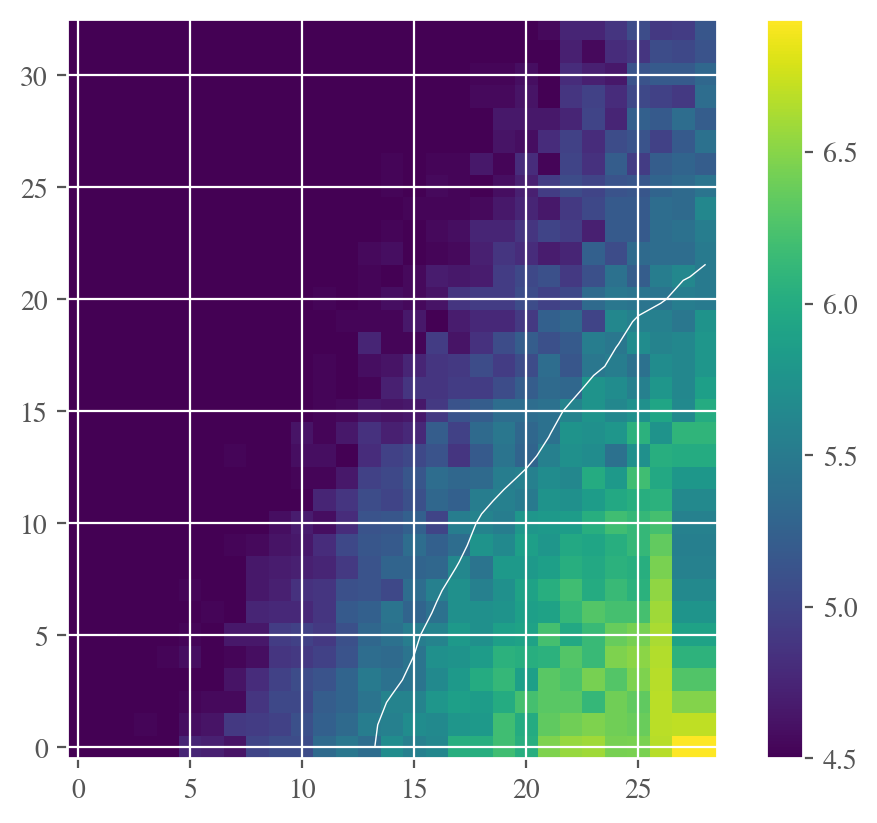

In [55]:
fig, ax = plt.subplots(1, 1)
img = ax.imshow(interpolate_df_30cm.values, origin='lower')
plt.colorbar(img)
for i in range(len(contours)):
    p = plt.Polygon(contours[i][:,[1,0]], fill=False, color='w', closed = False)
    ax.add_artist(p)
plt.show()

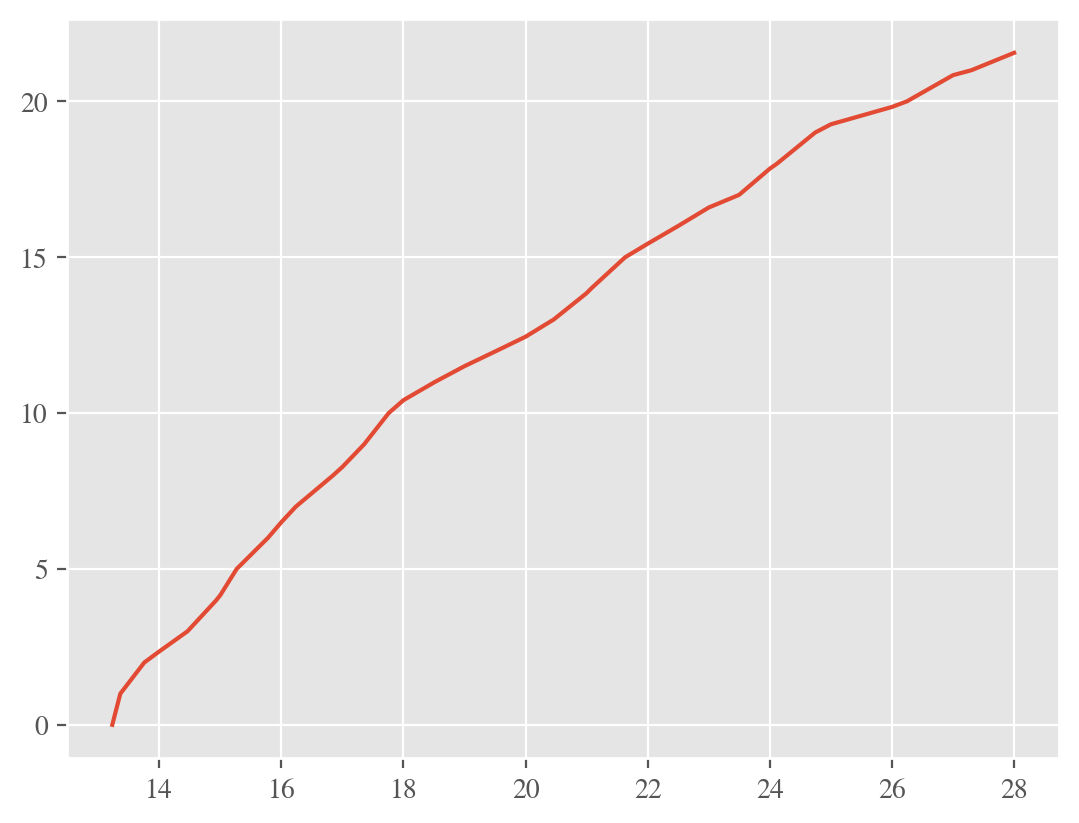

In [59]:
# Extract curve
contour_for_extraction = contours[0][contours[0][:, 1].argsort()]
x = contour_for_extraction[:,1]
y = contour_for_extraction[:,0]

# Convert back to initial units



plt.plot(x,y)
plt.show()

In [60]:
x

array([13.23084937, 13.36262039, 13.75569315, 14.        , 14.46259055,
       14.93553782, 15.        , 15.26782733, 15.78135505, 16.        ,
       16.23724937, 16.84576346, 17.        , 17.35593747, 17.75762059,
       18.        , 18.51564704, 19.        , 19.52693172, 20.        ,
       20.4589939 , 21.        , 21.07573461, 21.63081696, 22.        ,
       22.49647795, 23.        , 23.49624444, 24.        , 24.11550447,
       24.74231011, 25.        , 26.        , 26.24482833, 27.        ,
       27.30311992, 28.        ])